Task:
   1. Скачать котировки 2-х компаний с дневными показателями.(Выбрать компании из разных секторов экономики. Период скачивания - 1 год. 
   2. Выполнить анализ рядов на стационарность;
   3. Построить гистограммы распределения цен и логарифмических доходностей;
   4. Построить модели инструментами: 
   4.1 ARIMA,  
   4.2 ThymBoost. 
   Для каждой модели подобрать оптимальный параметры, обучить модель на разных периодах - год, пол-года, 3 месяца, построить прогноз на две недели в каждом случае. Сравнить, СДЕЛАТЬ ВЫВОДЫ. 
   

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pll
import seaborn as sns
import math 

# Cкачиваем котировки компаний

In [94]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y%m%d')
dataNFLX = pd.read_csv('NFLX.csv', parse_dates=['<DATE>'], index_col='<DATE>',date_parser=dateparse)
dataNFLX['logProfit']=np.log2(dataNFLX['<CLOSE>']/dataNFLX['<OPEN>'])

dataNFLX

<ipython-input-94-f74258bfcf6b>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y%m%d')


,<TICKER>,<PER>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,logProfit
<DATE>,,,,,,,,,
2020-08-24,NFLX-RM,W,0,36284.0,42024.0,36260.0,38823.0,1498,0.097578
2020-08-31,NFLX-RM,W,0,39246.0,42500.0,36837.0,39019.0,2199,-0.008369
2020-09-07,NFLX-RM,W,0,39001.0,39695.0,35959.0,36231.0,1862,-0.106286
2020-09-14,NFLX-RM,W,0,36356.0,37750.0,34800.0,35575.0,2616,-0.031330
2020-09-21,NFLX-RM,W,0,35436.0,37836.0,35200.0,37826.0,1950,0.094162
...,...,...,...,...,...,...,...,...,...
2021-11-29,NFLX-RM,W,0,50144.0,50460.0,44008.0,44008.0,1706,-0.188311
2021-12-06,NFLX-RM,W,0,44666.0,47000.0,44241.0,44709.0,1786,0.001388
2021-12-13,NFLX-RM,W,0,44778.0,45800.0,43200.0,43567.0,1434,-0.039554


In [49]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y%m%d')
dataNVDA = pd.read_csv('NVDA.csv', parse_dates=['<DATE>'], index_col='<DATE>',date_parser=dateparse)
dataNVDA['logProfit']=np.log2(dataNVDA['<CLOSE>']/dataNVDA['<OPEN>'])

dataNVDA

<ipython-input-49-54358df92124>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y%m%d')


,<TICKER>,<PER>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,logProfit
<DATE>,,,,,,,,,
2021-03-22,NVDA-RM,W,0,38278.0,40540.0,37500.0,38802.0,4814,0.019616
2021-03-29,NVDA-RM,W,0,38680.0,42316.0,38588.0,42168.0,2912,0.124561
2021-04-05,NVDA-RM,W,0,41997.0,44545.0,41923.0,44458.0,3486,0.082157
2021-04-12,NVDA-RM,W,0,44746.0,49564.0,43831.0,48299.0,6621,0.110235
2021-04-19,NVDA-RM,W,0,48598.0,48733.0,44057.0,45665.0,3605,-0.089808
2021-04-26,NVDA-RM,W,0,45665.0,46919.0,45000.0,45186.0,1473,-0.015213
2021-05-03,NVDA-RM,W,0,44529.0,44707.0,42114.0,43750.0,2814,-0.025462
2021-05-10,NVDA-RM,W,0,43977.0,43977.0,39964.0,42161.0,2633,-0.060840
2021-05-17,NVDA-RM,W,0,42161.0,44725.0,39770.0,44156.0,3482,0.066700


# Анализ рядов на стационарность & ARIMA

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [162]:
dataNFLX.index 

DatetimeIndex(['2020-08-24', '2020-08-31', '2020-09-07', '2020-09-14',
               '2020-09-21', '2020-09-28', '2020-10-05', '2020-10-12',
               '2020-10-19', '2020-10-26', '2020-11-02', '2020-11-09',
               '2020-11-16', '2020-11-23', '2020-11-30', '2020-12-07',
               '2020-12-14', '2020-12-21', '2020-12-28', '2021-01-04',
               '2021-01-11', '2021-01-18', '2021-01-25', '2021-02-01',
               '2021-02-08', '2021-02-15', '2021-02-22', '2021-03-01',
               '2021-03-08', '2021-03-15', '2021-03-22', '2021-03-29',
               '2021-04-05', '2021-04-12', '2021-04-19', '2021-04-26',
               '2021-05-03', '2021-05-10', '2021-05-17', '2021-05-24',
               '2021-05-31', '2021-06-07', '2021-06-14', '2021-06-21',
               '2021-06-28', '2021-07-05', '2021-07-12', '2021-07-19',
               '2021-07-26', '2021-08-02', '2021-08-09', '2021-08-16',
               '2021-08-23', '2021-08-30', '2021-09-06', '2021-09-13',
      

In [163]:
xx=dataNFLX.columns.to_list()
tsNFLX = dataNFLX[xx[6]] 
tsNFLX.head(18)

<DATE>
2020-08-24    38823.0
2020-08-31    39019.0
2020-09-07    36231.0
2020-09-14    35575.0
2020-09-21    37826.0
2020-09-28    39420.0
2020-10-05    41455.0
2020-10-12    41410.0
2020-10-19    37212.0
2020-10-26    37989.0
2020-11-02    39699.0
2020-11-09    37351.0
2020-11-16    37337.0
2020-11-23    37193.0
2020-11-30    36907.0
2020-12-07    36685.0
2020-12-14    38661.0
2020-12-21    38082.0
Name: <CLOSE>, dtype: float64

In [164]:
tsNFLX

<DATE>
2020-08-24    38823.0
2020-08-31    39019.0
2020-09-07    36231.0
2020-09-14    35575.0
2020-09-21    37826.0
               ...   
2021-11-29    44008.0
2021-12-06    44709.0
2021-12-13    43567.0
2021-12-20    45125.0
2021-12-27    45866.0
Name: <CLOSE>, Length: 71, dtype: float64

In [165]:
tsNFLX.sort_index(inplace=True)
decomp_AP=seasonal_decompose(tsNFLX, period=12)
decomp_AP

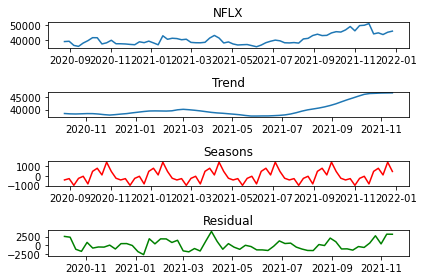

In [166]:
trend=decomp_AP.trend
season=decomp_AP.seasonal
resid=decomp_AP.resid


pll.subplot(411)
pll.plot(tsNFLX)
pll.title('NFLX')
pll.subplot(412)
pll.plot(trend)
pll.title('Trend')
pll.subplot(413)
pll.plot(season, 'r')
pll.title('Seasons')
pll.subplot(414)
pll.plot(resid, 'g')
pll.title('Residual')
pll.tight_layout()

In [167]:
resid.dropna(inplace=True)

from statsmodels.tsa.stattools import acf 

ts_diff=np.array(resid[1:])/np.array(resid[:-1])
lag_AP=acf(ts_diff, nlags=20)
lag_AP

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.00000000e+00,  7.09722604e-04,  3.97408894e-03, -1.90253518e-02,
       -1.42899612e-01,  7.49939434e-03,  4.30338816e-03,  1.01548237e-02,
       -6.88030808e-02,  3.98479003e-02, -5.78011934e-02, -1.69646388e-02,
       -4.51395042e-03, -8.87799109e-03,  1.54702036e-01, -1.92265994e-02,
       -2.97688107e-02, -9.85847604e-03,  2.37109163e-02,  2.08743295e-03,
       -1.67678207e-01])

Text(0.5, 1.0, 'Autocorrelation Function')

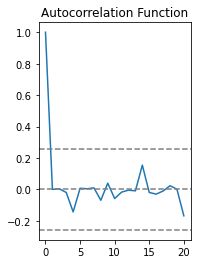

In [168]:
plt.subplot(121) 
plt.plot(lag_AP)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

Text(0.5, 1.0, 'Partial Autocorrelation Function')

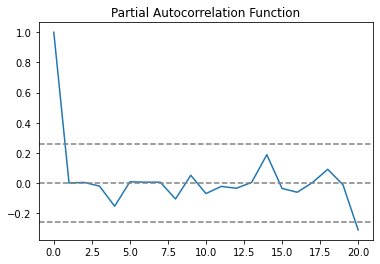

In [169]:
from statsmodels.tsa.stattools import pacf 

plag_AP=pacf(ts_diff, nlags=20)
plt.plot(plag_AP)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

In [170]:
from statsmodels.tsa.arima_model import ARIMA

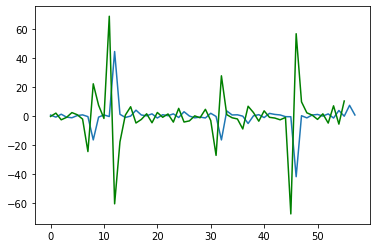

In [173]:
model = ARIMA(ts_diff, order=(2, 2, 1))
model_fit=model.fit()
pll.plot(ts_diff)
pll.plot(-model_fit.fittedvalues, color='green')

In [174]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   56
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -213.043
Method:                       css-mle   S.D. of innovations             10.314
Date:                Thu, 17 Mar 2022   AIC                            436.085
Time:                        23:26:45   BIC                            446.212
Sample:                             2   HQIC                           440.011
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0067      0.044      0.150      0.881      -0.080       0.094
ar.L1.D2.y    -0.6413      0.126     -5.075      0.000      -0.889      -0.394
ar.L2.D2.y    -0.2974      0.125     -2.374      0.0

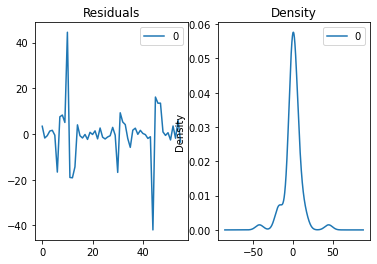

In [175]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

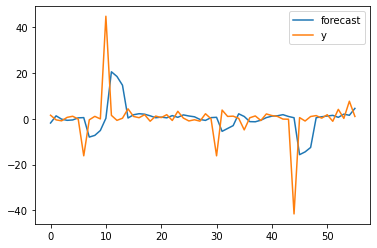

In [176]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [177]:
dataNVDA.index 

DatetimeIndex(['2021-03-22', '2021-03-29', '2021-04-05', '2021-04-12',
               '2021-04-19', '2021-04-26', '2021-05-03', '2021-05-10',
               '2021-05-17', '2021-05-24', '2021-05-31', '2021-06-07',
               '2021-06-14', '2021-06-21', '2021-06-28', '2021-07-05',
               '2021-07-12', '2021-07-19', '2021-07-26', '2021-08-02',
               '2021-08-09', '2021-08-16', '2021-08-23', '2021-08-30',
               '2021-09-06', '2021-09-13', '2021-09-20', '2021-09-27',
               '2021-10-04', '2021-10-11', '2021-10-18', '2021-10-25',
               '2021-11-01', '2021-11-08', '2021-11-15', '2021-11-22',
               '2021-11-29', '2021-12-06', '2021-12-13', '2021-12-20',
               '2021-12-27', '2022-01-03', '2022-01-10', '2022-01-17',
               '2022-01-24', '2022-01-31', '2022-02-07', '2022-02-14',
               '2022-02-21'],
              dtype='datetime64[ns]', name='<DATE>', freq=None)

In [178]:
xx=dataNVDA.columns.to_list()
tsNVDA = dataNVDA[xx[6]] 
tsNVDA.head(18)

<DATE>
2021-03-22    0.019616
2021-03-29    0.124561
2021-04-05    0.082157
2021-04-12    0.110235
2021-04-19   -0.089808
2021-04-26   -0.015213
2021-05-03   -0.025462
2021-05-10   -0.060840
2021-05-17    0.066700
2021-05-24    0.097762
2021-05-31    0.111820
2021-06-07    0.005991
2021-06-14    0.070533
2021-06-21    0.017685
2021-06-28    0.112418
2021-07-05   -0.028627
2021-07-12   -0.046788
2021-07-19   -0.107001
Name: logProfit, dtype: float64

In [179]:
tsNVDA

<DATE>
2021-03-22    0.019616
2021-03-29    0.124561
2021-04-05    0.082157
2021-04-12    0.110235
2021-04-19   -0.089808
2021-04-26   -0.015213
2021-05-03   -0.025462
2021-05-10   -0.060840
2021-05-17    0.066700
2021-05-24    0.097762
2021-05-31    0.111820
2021-06-07    0.005991
2021-06-14    0.070533
2021-06-21    0.017685
2021-06-28    0.112418
2021-07-05   -0.028627
2021-07-12   -0.046788
2021-07-19   -0.107001
2021-07-26   -0.017388
2021-08-02    0.053275
2021-08-09   -0.020483
2021-08-16    0.032165
2021-08-23    0.080657
2021-08-30    0.002086
2021-09-06   -0.032630
2021-09-13   -0.045383
2021-09-20    0.023226
2021-09-27   -0.089193
2021-10-04   -0.005586
2021-10-11    0.057514
2021-10-18    0.050981
2021-10-25    0.166026
2021-11-01    0.218671
2021-11-08    0.057180
2021-11-15    0.132949
2021-11-22   -0.057118
2021-11-29   -0.069518
2021-12-06   -0.064065
2021-12-13   -0.098075
2021-12-20    0.088526
2021-12-27    0.024066
2022-01-03   -0.093644
2022-01-10   -0.014375
2022

In [180]:
tsNVDA.sort_index(inplace=True)
decomp_AP=seasonal_decompose(tsNVDA, period=12)
decomp_AP

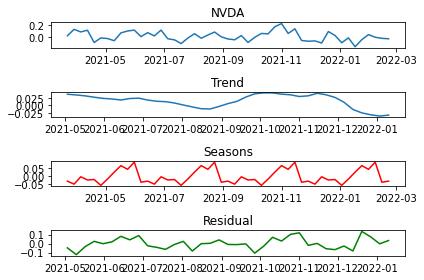

In [181]:
trend=decomp_AP.trend
season=decomp_AP.seasonal
resid=decomp_AP.resid


pll.subplot(411)
pll.plot(tsNVDA)
pll.title('NVDA')
pll.subplot(412)
pll.plot(trend)
pll.title('Trend')
pll.subplot(413)
pll.plot(season, 'r')
pll.title('Seasons')
pll.subplot(414)
pll.plot(resid, 'g')
pll.title('Residual')
pll.tight_layout()

In [182]:
resid.dropna(inplace=True)

from statsmodels.tsa.stattools import acf 

ts_diff=np.array(resid[1:])/np.array(resid[:-1])
lag_AP=acf(ts_diff, nlags=20)
lag_AP

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        , -0.04000984, -0.01127622, -0.05218852,  0.14438284,
       -0.05627797, -0.00667791,  0.11281432, -0.31102469,  0.04920513,
        0.00869386,  0.08196404, -0.20567966,  0.09170869, -0.00370234,
       -0.16098522, -0.21543272, -0.00950397, -0.00750369, -0.08740861,
        0.04750384])

Text(0.5, 1.0, 'Autocorrelation Function')

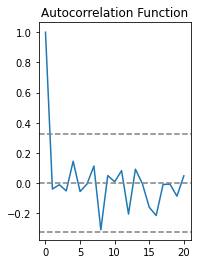

In [183]:
plt.subplot(121) 
plt.plot(lag_AP)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

Text(0.5, 1.0, 'Partial Autocorrelation Function')

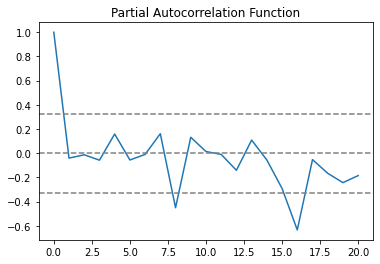

In [184]:
from statsmodels.tsa.stattools import pacf 

plag_AP=pacf(ts_diff, nlags=20)
plt.plot(plag_AP)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

In [185]:
from statsmodels.tsa.arima_model import ARIMA

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


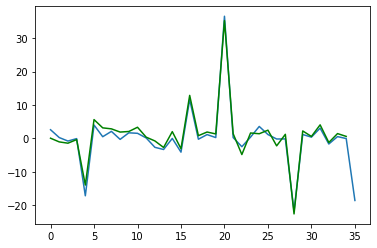

In [186]:
model = ARIMA(ts_diff, order=(2, 1, 2))
model_fit=model.fit()
pll.plot(ts_diff)
pll.plot(-resid_110.fittedvalues, color='green')

In [187]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   35
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -126.969
Method:                       css-mle   S.D. of innovations              8.546
Date:                Thu, 17 Mar 2022   AIC                            265.938
Time:                        23:27:01   BIC                            275.270
Sample:                             1   HQIC                           269.160
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0724      0.138     -0.525      0.599      -0.342       0.198
ar.L1.D.y     -0.9696      0.182     -5.325      0.000      -1.327      -0.613
ar.L2.D.y     -0.0375      0.180     -0.209      0.8

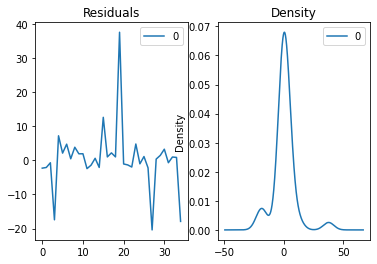

In [188]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

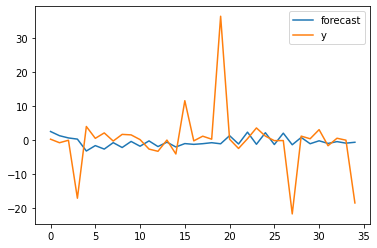

In [189]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [217]:
ts_diff.shape
ts_diff

array([ 2.60918533e+00,  2.68717401e-01, -7.72579296e-01, -4.63761913e-02,
       -1.71323839e+01,  4.01444918e+00,  5.20935745e-01,  2.11976306e+00,
       -2.73054753e-01,  1.68629240e+00,  1.54183657e+00,  1.48400196e-01,
       -2.64597901e+00, -3.29915533e+00,  1.05990587e-02, -4.09117371e+00,
        1.16200943e+01, -2.25000121e-01,  1.15536744e+00,  2.68309672e-01,
        3.65225632e+01,  2.70406348e-01, -2.46384862e+00,  4.05869571e-01,
        3.58568055e+00,  1.17331691e+00, -1.62592621e-01, -1.33235652e-01,
       -2.17639353e+01,  1.17738780e+00,  3.96341259e-01,  3.08610917e+00,
       -1.65524906e+00,  5.53524564e-01, -2.48456960e-02, -1.85319210e+01])

In [229]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = ts_diff[:20]
test = ts_diff[20:]
train = train.reset_index()
test = test.reset_index()

AttributeError: 'numpy.ndarray' object has no attribute 'reset_index'

In [228]:
model = ARIMA(train, order=(2, 2, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(16, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'index'

# Гистограммы распределения цен и логарифмических доходностей

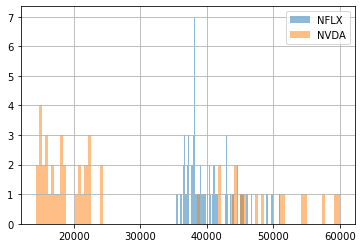

In [101]:
dataNFLX['<CLOSE>'].hist(bins=100, label='NFLX',alpha=0.5)
dataNVDA['<CLOSE>'].hist(bins=100,label='NVDA',alpha=0.5)
plt.legend()
plt.show()

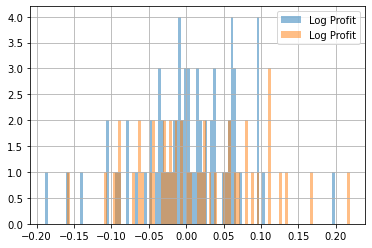

In [103]:
dataNFLX['logProfit'].hist(bins=100,label='Log Profit',alpha=0.5)
dataNVDA['logProfit'].hist(bins=100,label='Log Profit',alpha=0.5)
plt.legend()
plt.show()

# ThymeBoost

In [207]:
pip install ThymeBoost

     |████████████████████████████████| 52 kB 891 kB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [208]:
from ThymeBoost import ThymeBoost as tb

In [238]:
#del dataNFLX["<TICKER>"]
del dataNFLX["<PER>"]

In [259]:
y = dataNFLX.to_numpy()

y = dataNFLX.astype('float64')

<DATE>
2020-08-24    42024.0
2020-08-31    42500.0
2020-09-07    39695.0
2020-09-14    37750.0
2020-09-21    37836.0
2020-09-28    41172.0
2020-10-05    41967.0
2020-10-12    44195.0
2020-10-19    42600.0
2020-10-26    40350.0
2020-11-02    40001.0
2020-11-09    40393.0
2020-11-16    38540.0
2020-11-23    37472.0
2020-11-30    38564.0
Name: <HIGH>, dtype: float64

In [244]:
boost_mod=tb.ThymeBoost(approximate_splits=True, 
                        n_split_proposals=25,
                        verbose=1,
                        cost_penalty=0.001)

In [260]:
output=boost_mod.fit(y.iloc[:135,5], trend_estimator=['mean']+['linear']*10,
                    seasonal_estimator='fourier',
                    seasonal_period=12,
                    split_cost='mse',
                    global_cost='maicc',
                    fit_type='global')

********** Round 1 **********
Using Split: None
Fitting initial trend globally with trend model:
median()
seasonal model:
fourier(10, False)
cost: 428.81901472197455
********** Round 2 **********
Using Split: None
Fitting global with trend model:
mean()
seasonal model:
fourier(10, False)
cost: -681.8446843525137
********** Round 3 **********
Using Split: None
Fitting global with trend model:
linear((1, None))
seasonal model:
fourier(10, False)
cost: -681.8446843525137
Boosting Terminated 
Using round 3


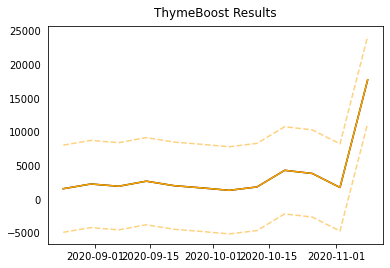

In [261]:
boost_mod.plot_results(output)

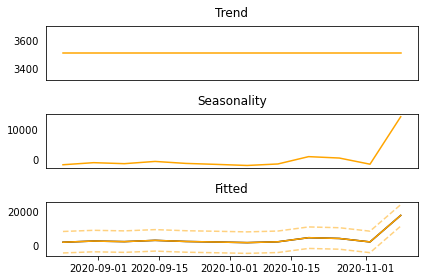

In [262]:
boost_mod.plot_components(output)

In [263]:
boost_mod=tb.ThymeBoost(approximate_splits=True, 
                        n_split_proposals=25,
                        verbose=1,
                        cost_penalty=0.001)

In [264]:
output=boost_mod.fit(y.iloc[:135,5], trend_estimator=['mean']+['linear']*10,
                    seasonal_estimator='fourier',
                    seasonal_period=10,
                    split_cost='mse',
                    global_cost='maicc',
                    fit_type='global')

********** Round 1 **********
Using Split: None
Fitting initial trend globally with trend model:
median()
seasonal model:
fourier(10, False)
cost: 1145.3782012095946
********** Round 2 **********
Using Split: None
Fitting global with trend model:
mean()
seasonal model:
fourier(10, False)
cost: 1103.7232710155427
********** Round 3 **********
Using Split: None
Fitting global with trend model:
linear((1, None))
seasonal model:
fourier(10, False)
cost: 1101.426918299778
Boosting Terminated 
Using round 3


In [265]:
predict_out=boost_mod.predict(output,6)

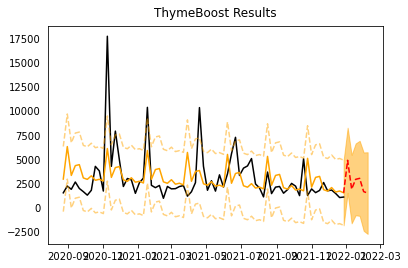

In [266]:
boost_mod.plot_results(output,predict_out)

In [269]:
boost_mod=tb.ThymeBoost(approximate_splits=True, 
                        verbose=1,
                        cost_penalty=0.001)

output=boost_mod.fit(y.iloc[:135,6], trend_estimator=['mean']+['linear']*10,
                    seasonal_estimator='fourier',
                    seasonal_period=[12,0] ,
                    split_cost='mse',
                    global_cost='maicc',
                    fit_type='local',
                    connectivity_constraint=True,
                    )

predict_out=boost_mod.predict(output,6)

********** Round 1 **********
Using Split: None
Fitting initial trend globally with trend model:
median()
seasonal model:
fourier(10, False)
cost: -365.02734125303164
Boosting Terminated 
Using round 1


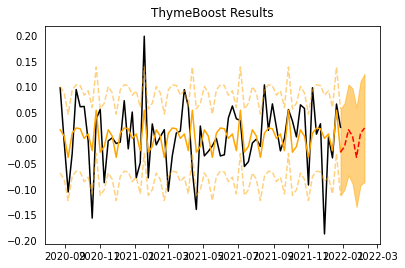

In [270]:
boost_mod.plot_results(output,predict_out)

********** Round 1 **********
Using Split: None
Fitting initial trend globally with trend model:
median()
seasonal model:
fourier(10, False)
cost: 163.77276433690514
********** Round 2 **********
Using Split: 2021-11-15 00:00:00
Fitting local with trend model:
mean()
seasonal model:
None
cost: -462.9248411733933
********** Round 3 **********
Using Split: 2021-11-15 00:00:00
Fitting local with trend model:
linear((1, None))
seasonal model:
fourier(10, False)
cost: -470.7220617401422
Boosting Terminated 
Using round 3


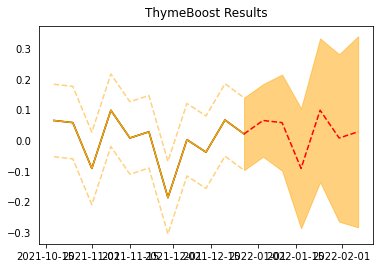

In [272]:
boost_mod=tb.ThymeBoost(approximate_splits=True, 
                        verbose=1,
                        cost_penalty=0.001)

output=boost_mod.fit(y.iloc[60:135,6], trend_estimator=['mean']+['linear']*10,
                    seasonal_estimator='fourier',
                    seasonal_period=[12,0] ,
                    split_cost='mse',
                    global_cost='maicc',
                    fit_type='local',
                    connectivity_constraint=[False]+[True]*10,
                    )

predict_out=boost_mod.predict(output,6)
boost_mod.plot_results(output,predict_out)

********** Round 1 **********
Using Split: None
Fitting initial trend globally with trend model:
median()
seasonal model:
fourier(10, False)
cost: -365.02734125303164


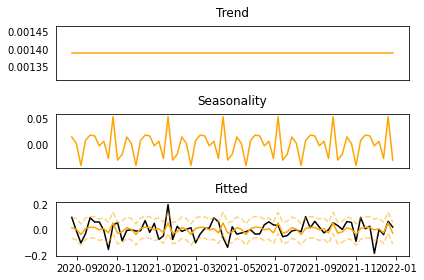

In [275]:
boost_mod=tb.ThymeBoost(approximate_splits=True, 
                        verbose=1,
                        cost_penalty=0.001,
                        n_rounds=1)

output=boost_mod.fit(y.iloc[:135,6],
                    trend_estimator='arima',
                    arima_order=[(1,0,0), (1,0,1), (1,1,1)],
                    seasonal_estimator='fourier',
                    seasonal_period=12 ,
                    split_cost='mse',
                    global_cost='maicc',
                    fit_type='global',
                    )

predict_out=boost_mod.predict(output,6)
boost_mod.plot_components(output)
#boost_mod.plot_results(output,predict_out)

********** Round 1 **********
Using Split: None
Fitting initial trend globally with trend model:
median()
seasonal model:
fourier(10, False)
cost: -365.02734125303164
********** Round 2 **********
Using Split: None
Fitting global with trend model:
arima((1, 0, 0))
seasonal model:
fourier(10, False)
cost: -360.46719119939013
********** Round 3 **********
Using Split: None
Fitting global with trend model:
arima((1, 0, 1))
seasonal model:
fourier(10, False)
cost: -359.4769107623572
********** Round 4 **********
Using Split: None
Fitting global with trend model:
arima((1, 1, 1))
seasonal model:
fourier(10, False)
cost: -348.0570652109229


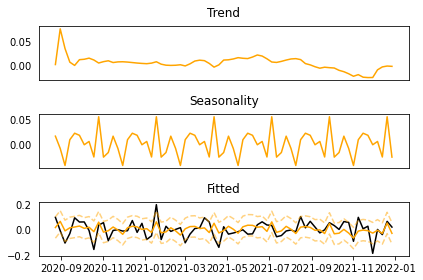

In [276]:
boost_mod=tb.ThymeBoost(approximate_splits=True, 
                        verbose=1,
                        cost_penalty=0.001,
                        n_rounds=4,
                        regularization=1.2)

output=boost_mod.fit(y.iloc[:135,6],
                    trend_estimator='arima',
                    arima_order=[(1,0,0), (1,0,1), (1,1,1)],
                    seasonal_estimator='fourier',
                    seasonal_period=12 ,
                    split_cost='mse',
                    global_cost='maicc',
                    fit_type='global',
                    )

predict_out=boost_mod.predict(output,6)
boost_mod.plot_components(output)
#boost_mod.plot_results(output,predict_out)

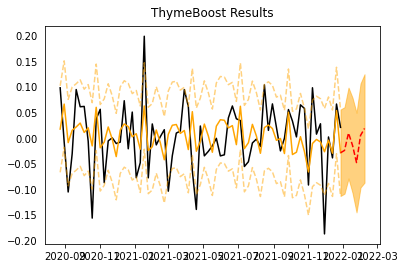

In [277]:
boost_mod.plot_results(output,predict_out)

# Как итог: модели неплохо описывают данные. Лучше всего в данном проекте себя показал инструмент ThymBoost, предсказательная способность моделей выше, чем результаты от других инструментов.